In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img
import cv2 as ip
import random

In [2]:
def k_means_clustering(image, kValue):
    image3D = ip.cvtColor(ip.imread(image),ip.COLOR_BGR2RGB) #Extracting image, basically cv2 module load image in BGR i am converting it to RGB
    rows, cols, RGB = image3D.shape #Extracting number of rows,coloumns, and inner colours in each pixel.
    image2D = np.reshape(image3D, (rows*cols, RGB)) #Converting 3D array to 2D.
    centroids = random.choices(image2D,k=kValue) #Selecting random centroids, according to values of k.
    distance = np.zeros(((rows*cols),kValue)) #2D array to store the distances
    closest_centroid = np.zeros(image2D.shape[0]) #1D array to store the closet distances
    for i in range(5): #iterating 5 times to update value of centroids   
        for j in range(image2D.shape[0]): #iterating over each row ie each pixel 
            for k in range(len(centroids)): #iterating over each centroid 
                distance[j,k] = np.linalg.norm(image2D[j] - centroids[k]) # Compute the 3D Euclidean distance using numpy.linalg.norm
            closest_centroid[j] = np.argmin(distance[j])  # Find the closest centroid ie if k=3 then 0 1 2

        new_points = np.zeros((kValue,3)) #2D array
        denominator = np.zeros(kValue) #1D array
        for j in range(image2D.shape[0]):
              inp = int(closest_centroid[j]) #Variable storing the particular closet_centroid index
              new_points[inp] += image2D[j] #at that particular index summing up all that rows
              denominator[int(closest_centroid[j])]+=1 #incrementing the count of centroids
        for j in range(len(new_points)):
              if(denominator[j]>0):
                    new_points[j]/=denominator[j] #taking average to find new centroids
        centroids = new_points.astype(int) # assigning updated centroids to the older randomly selected centroids value, in integer datatype
    
    for i in range(image2D.shape[0]):
                image2D[i] = centroids[int(closest_centroid[i])] #assigning each RGB value a particular centroid value that suits it
    image3DNew = np.reshape(image2D,(rows,cols,RGB))

    plt.title(f"Image with k value {kValue}") # plotting the clustered image
    plt.imshow(image3DNew)


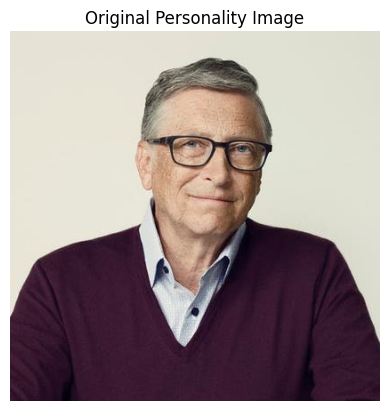

In [3]:
plt.title(f"Original Personality Image")
plt.imshow(img.imread("BillGates.jpg")) 
plt.axis('off')
plt.show()

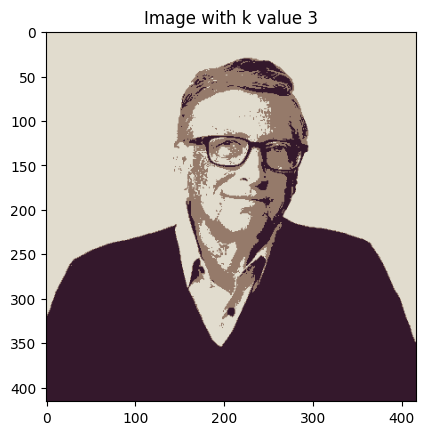

In [4]:
#Image 1(Personality) with k=3
k_means_clustering("BillGates.jpg",3)

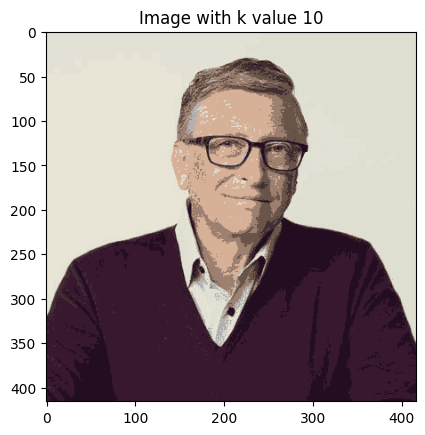

In [5]:
#Image 1(Personality) with k=10
k_means_clustering("BillGates.jpg",10)

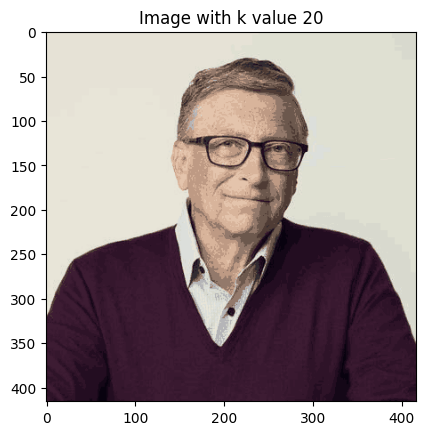

In [6]:
#Image 1(Personality) with k=20
k_means_clustering("BillGates.jpg",20)

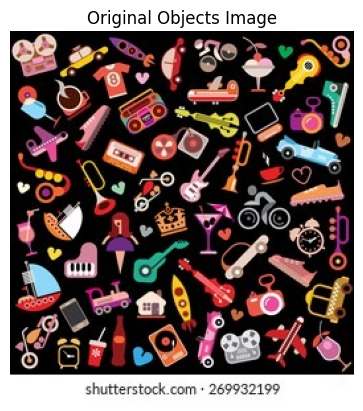

In [7]:
plt.title(f"Original Objects Image")
plt.imshow(img.imread("MultipleObjects.jpg")) 
plt.axis('off')
plt.show()

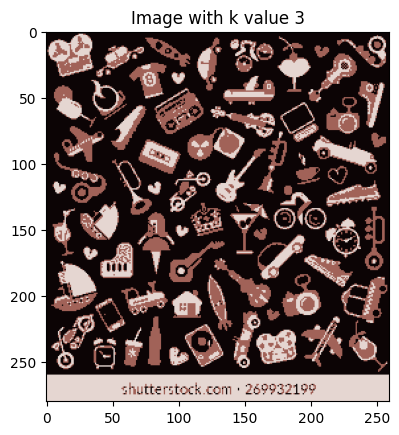

In [8]:
#Image 2(MultipleObjects) with k=3
k_means_clustering("MultipleObjects.jpg",3)

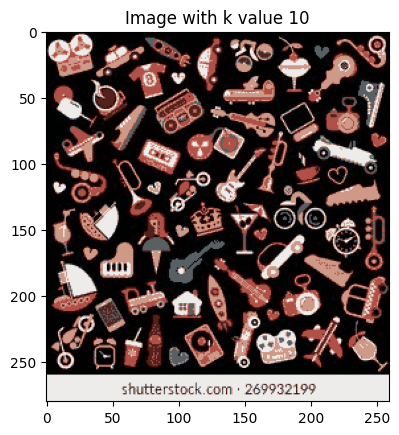

In [9]:
#Image 2(MultipleObjects) with k=10
k_means_clustering("MultipleObjects.jpg",10)

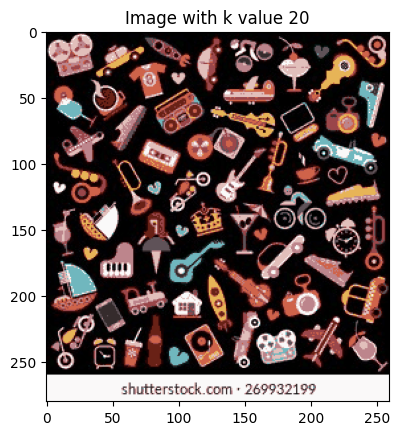

In [10]:
#Image 2(MultipleObjects) with k=10
k_means_clustering("MultipleObjects.jpg",20)

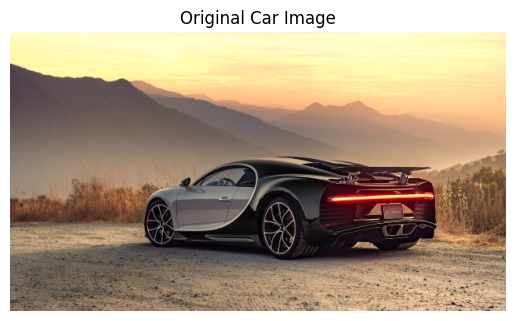

In [11]:
plt.title(f"Original Car Image")
plt.imshow(img.imread("Chiron.jpeg")) 
plt.axis('off')
plt.show()

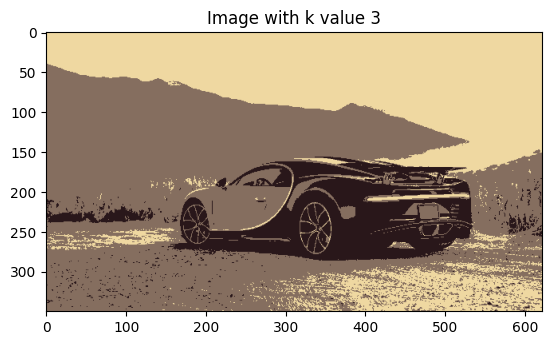

In [12]:
#Image 3(Car) with k=3
k_means_clustering("Chiron.jpeg",3)

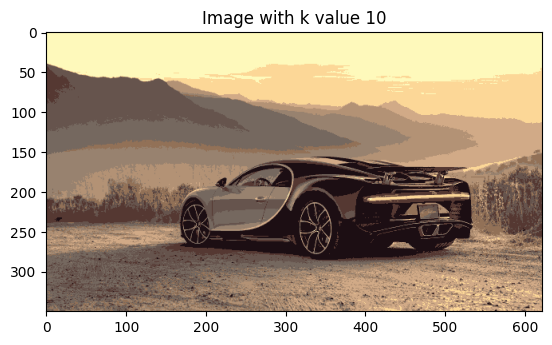

In [13]:
#Image 3(Car) with k=10
k_means_clustering("Chiron.jpeg",10)

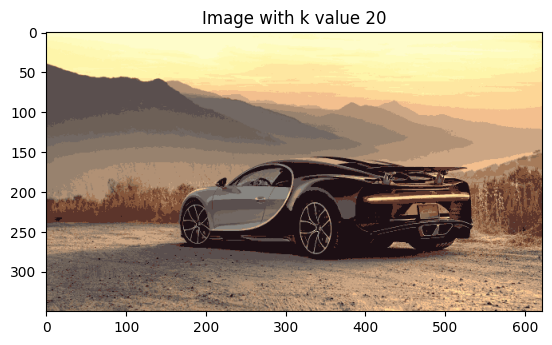

In [14]:
#Image 3(Car) with k=20
k_means_clustering("Chiron.jpeg",20)